In [2]:
import pandas as pd
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stm

In [5]:
data = pd.read_csv('yearly-water-usage.csv')

In [8]:
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset_water.csv')
validation.to_csv('validation_water.csv')

Dataset 69, Validation 10


In [9]:
from sklearn.metrics import mean_squared_error

def evaluate(test, predictions):
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    print('RMSE: %.3f' % rmse)

In [16]:
X = data.Water.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [17]:
history = [x for x in train]
predictions = list()

In [18]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=492.000, Expected=503
>Predicted=503.000, Expected=503
>Predicted=503.000, Expected=450
>Predicted=450.000, Expected=432
>Predicted=432.000, Expected=432
>Predicted=432.000, Expected=458
>Predicted=458.000, Expected=462
>Predicted=462.000, Expected=503
>Predicted=503.000, Expected=488
>Predicted=488.000, Expected=466
>Predicted=466.000, Expected=492
>Predicted=492.000, Expected=503
>Predicted=503.000, Expected=515
>Predicted=515.000, Expected=500
>Predicted=500.000, Expected=522
>Predicted=522.000, Expected=575
>Predicted=575.000, Expected=583
>Predicted=583.000, Expected=587
>Predicted=587.000, Expected=628
>Predicted=628.000, Expected=640
>Predicted=640.000, Expected=609
>Predicted=609.000, Expected=606
>Predicted=606.000, Expected=632
>Predicted=632.000, Expected=617
>Predicted=617.000, Expected=613
>Predicted=613.000, Expected=598
>Predicted=598.000, Expected=575
>Predicted=575.000, Expected=564
>Predicted=564.000, Expected=549
>Predicted=549.000, Expected=538
>Predicted

In [19]:
evaluate(test, predictions)

RMSE: 21.658


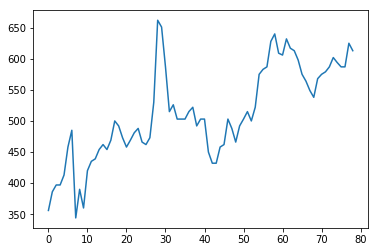

In [20]:
data.Water.plot()

In [30]:
from statsmodels.tsa.arima_model import ARIMA
series = pd.read_csv('dataset_water.csv')
# prepare data
X = series.Water.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

C:\Users\mxcsy\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\mxcsy\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\mxcsy\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

>Predicted=506.539, Expected=503
>Predicted=509.686, Expected=503
>Predicted=507.453, Expected=515
>Predicted=519.821, Expected=522
>Predicted=525.780, Expected=492
>Predicted=494.875, Expected=503
>Predicted=509.868, Expected=503
>Predicted=505.933, Expected=450
>Predicted=452.049, Expected=432
>Predicted=438.515, Expected=432
>Predicted=435.451, Expected=458
>Predicted=461.069, Expected=462
>Predicted=462.051, Expected=503
>Predicted=507.090, Expected=488
>Predicted=487.307, Expected=466
>Predicted=469.348, Expected=492
>Predicted=497.501, Expected=503
>Predicted=503.665, Expected=515
>Predicted=517.442, Expected=500
>Predicted=501.526, Expected=522
>Predicted=527.024, Expected=575
>Predicted=578.166, Expected=583
>Predicted=581.937, Expected=587
>Predicted=590.672, Expected=628
>Predicted=633.763, Expected=640
>Predicted=641.388, Expected=609
>Predicted=611.403, Expected=606
>Predicted=614.049, Expected=632
>Predicted=638.005, Expected=617
>Predicted=618.047, Expected=613
>Predicted

In [31]:
evaluate(test, predictions)

RMSE: 22.084
